***ESTUDIOS DE SUELOS EN ANTIOQUIA***

In [65]:
#importamos las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [68]:
data_fields = pd.read_csv('Areas_cultivadas_y_produccion_agr_cola_en_Antioquia_desde_1990-2022_20250716.csv')
df = data_fields.copy()
df.head()


,Tipo,Rubro,Subregion,Año,Municipio,Área Total,Área Producción,Volumen Producción
0,Permanentes,Aguacate,Oriente,1990,Abejorral,45.0,23.0,138.0
1,Permanentes,Aguacate,Urabá,1990,Apartadó,29.0,27.0,405.0
2,Permanentes,Aguacate,Suroeste,1990,Montebello,17.0,12.0,78.0
3,Permanentes,Aguacate,Suroeste,1990,Santa Bárbara,150.0,140.0,980.0
4,Permanentes,Aguacate,Urabá,1990,Turbo,75.0,55.0,825.0


In [22]:
df.dropna(inplace=True) #elimina las columnas no null
missing_count = df.isnull().sum()
value_count = df.isnull().count()
missing_percentage = round(missing_count / value_count * 100, 2)
missing_df = pd.DataFrame({"Cuantos Nulos": missing_count, "Porcentaje": missing_percentage})
missing_df

,Cuantos Nulos,Porcentaje
Tipo,0,0.0
Rubro,0,0.0
Subregion,0,0.0
Año,0,0.0
Municipio,0,0.0
Área Total,0,0.0
Área Producción,0,0.0
Volumen Producción,0,0.0


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Año,32261.0,2009.625120,8.901887,1990.0,2003.0,2011.0,2017.0,2022.0
Área Total,32261.0,440.667171,1230.922963,0.0,20.0,79.0,322.0,36000.0
Área Producción,32261.0,399.733004,1146.032283,0.0,15.0,65.0,285.0,36000.0
Volumen Producción,32261.0,3171.734478,23320.412719,0.0,58.8,296.0,1292.5,1039280.0


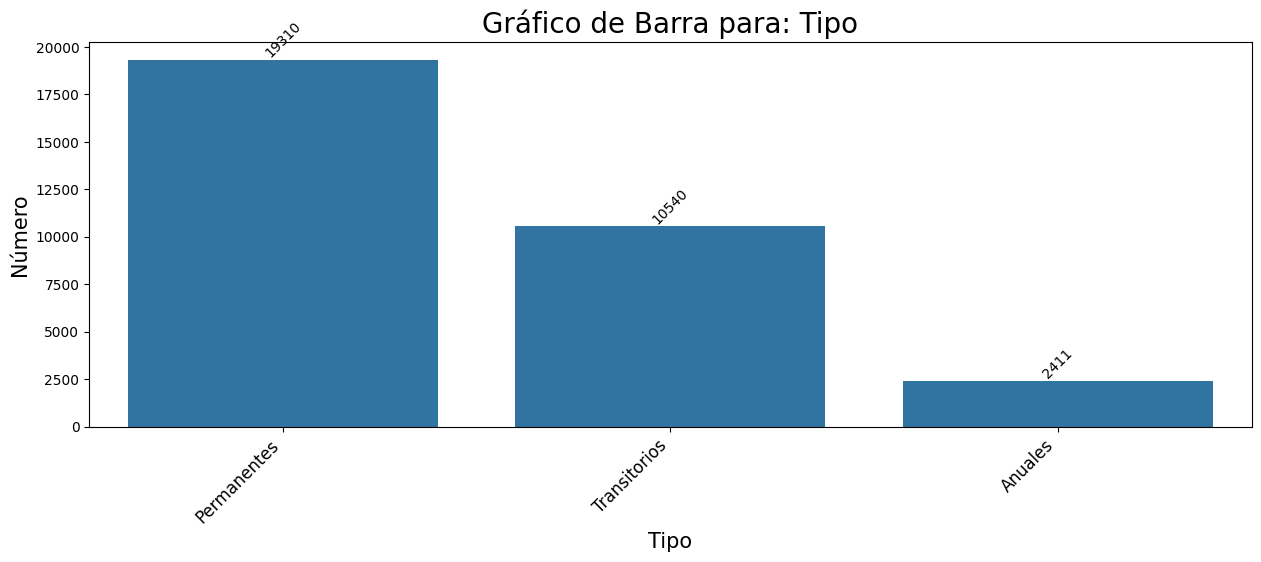

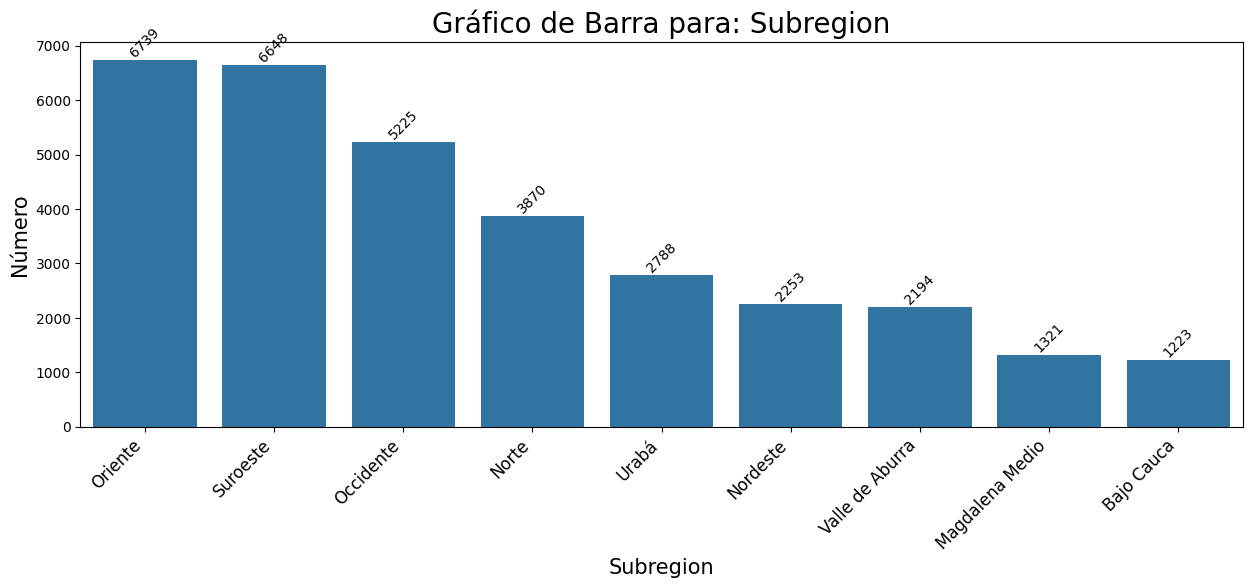

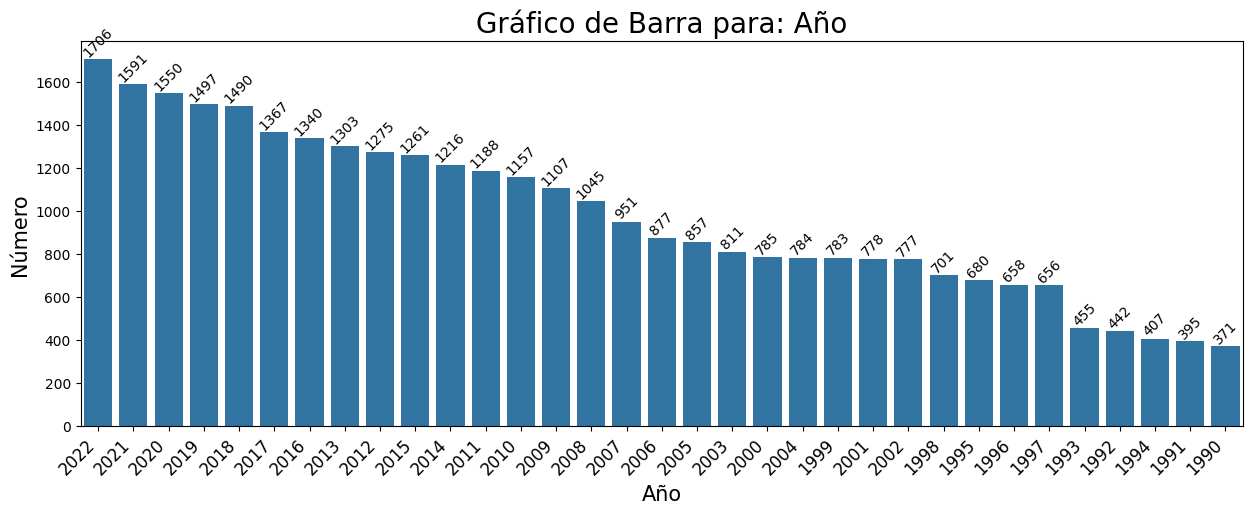

In [24]:
# Visualización de los datos categóricos
import plotly.graph_objects as go
import plotly.express as px

def plot_bar_graphs(df, columns):
    for column in columns:
        plt.figure(figsize=(15, 5))
        ax = sns.countplot(x=column, data=df, order=df[column].value_counts().index)
        ax.bar_label(ax.containers[0],rotation=45)
        plt.xlabel(column, fontsize=15)
        plt.ylabel('Número', fontsize=15)
        plt.title(f'Gráfico de Barra para: {column}', fontsize=20)
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.show()

cat_features = ["Tipo", "Subregion","Año"]

plot_bar_graphs(df, cat_features)

In [25]:
df_label_encoded = df.copy()
categorical_columns = ["Tipo", "Rubro", "Subregion", "Municipio"]
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df_label_encoded[column] = le.fit_transform(df_label_encoded[column])
    label_encoders[column] = le
    
df_label_encoded.head()

,Tipo,Rubro,Subregion,Año,Municipio,Área Total,Área Producción,Volumen Producción
0,1,6,5,1990,12,45.0,23.0,138.0
1,1,6,7,1990,22,29.0,27.0,405.0
2,1,6,6,1990,85,17.0,12.0,78.0
3,1,6,6,1990,115,150.0,140.0,980.0
4,1,6,7,1990,126,75.0,55.0,825.0


In [26]:
df_label_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32261 entries, 0 to 32720
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tipo                32261 non-null  int64  
 1   Rubro               32261 non-null  int64  
 2   Subregion           32261 non-null  int64  
 3   Año                 32261 non-null  int64  
 4   Municipio           32261 non-null  int64  
 5   Área Total          32261 non-null  float64
 6   Área Producción     32261 non-null  float64
 7   Volumen Producción  32261 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 2.2 MB


***MATRIZ DE CORRELACION***

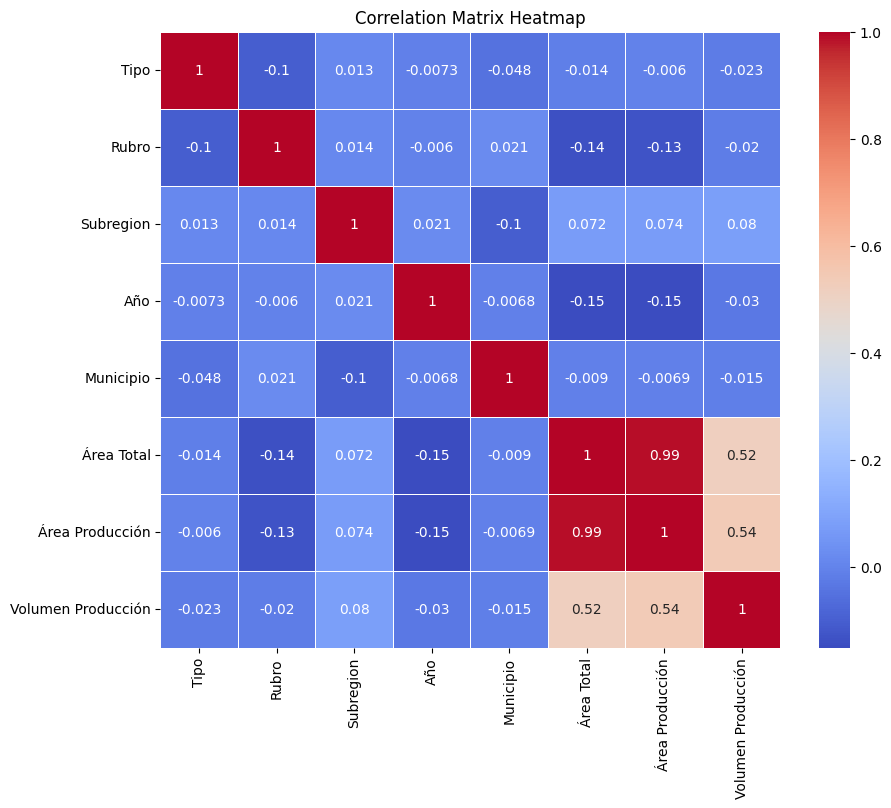

In [29]:
correlation_matrix = df_label_encoded.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

***MACHINE***

In [53]:
Y = df_label_encoded['Rubro']
X = df_label_encoded.drop(['Rubro'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8)


***LOGISTIC REGRESSION***

In [54]:
model_L = LogisticRegression(max_iter=1000)
model_L.fit(X_train, y_train)

c:\Users\nicol\OneDrive\Escritorio\maching learning\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [57]:
y_pred_L = model_L.predict(X_test)
accuracy_L = model_L.score(X_test, y_test)
print(f"Accuracy: {accuracy_L * 100:.2f}%")

Accuracy: 27.83%


***DECISIONTREECLASSIFIER***

In [52]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [ ]:

y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 71.56%


***RANDOMFORESTCLASSIFIER***

In [63]:
model_RM = RandomForestClassifier()
model_RM.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [64]:
y_pred_RM = model_RM.predict(X_test)
accuracy_RM = model_RM.score(X_test, y_test)
print(f"Accuracy: {accuracy_RM * 100:.2f}%")

Accuracy: 80.61%


GAUSIIANNB

In [66]:
model_G = GaussianNB()
model_G.fit(X_train, y_train)

c:\Users\nicol\OneDrive\Escritorio\maching learning\.venv\Lib\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  ys_types = set(type_of_target(x) for x in ys)


,priors,None
,var_smoothing,1e-09


In [67]:
y_pred_G = model_G.predict(X_test)
accuracy_G = model_G.score(X_test, y_test)
print(f"Accuracy: {accuracy_G * 100:.2f}%")

Accuracy: 15.79%
